In [ ]:
#importing neccessary directories

In [1]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [9]:
import warnings

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [19]:
from sklearn.compose import ColumnTransformer

In [21]:
from sklearn.pipeline import Pipeline

In [23]:
from sklearn.impute import SimpleImputer

In [25]:
from xgboost import XGBClassifier

In [ ]:
# Suppress warnings and set up inline plotting

In [27]:
%matplotlib inline

In [29]:
warnings.filterwarnings('ignore')

In [ ]:
# Changing directory

In [31]:
import os

In [33]:
print (os.getcwd())

C:\Users\ADMIN


In [35]:
os.chdir(r'C:\Users\ADMIN\Desktop')

In [ ]:
# Loading dataset 

In [37]:
df = pd.read_csv('Bank Customer Churn Prediction.csv') 

In [ ]:
#Data Exploration

In [39]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [43]:
df.describe().round(2)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [45]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [47]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
#Drop non-predictive columns

In [49]:
df = df.drop(columns=['customer_id'])

In [51]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Data preprocessing: Mapping categorical variables

In [53]:
df['country'] = df['country'].map({'France': 0, 'Spain': 1, 'Germany': 2})
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [55]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Count of categorical features

In [57]:
categorical_features = ['country', 'gender', 'credit_card', 'active_member']
print("Count of Categorical Features:")
for feature in categorical_features:
    print(f"\n{feature} value counts:\n", df[feature].value_counts())

Count of Categorical Features:

country value counts:
 country
0    5014
2    2509
1    2477
Name: count, dtype: int64

gender value counts:
 gender
0    5457
1    4543
Name: count, dtype: int64

credit_card value counts:
 credit_card
1    7055
0    2945
Name: count, dtype: int64

active_member value counts:
 active_member
1    5151
0    4849
Name: count, dtype: int64


In [ ]:
# Visualizations

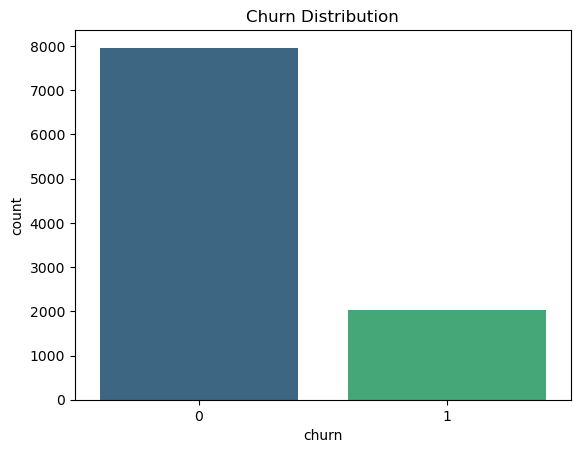

In [59]:
sns.countplot(x='churn', data=df, palette="viridis")
plt.title('Churn Distribution')
plt.show()

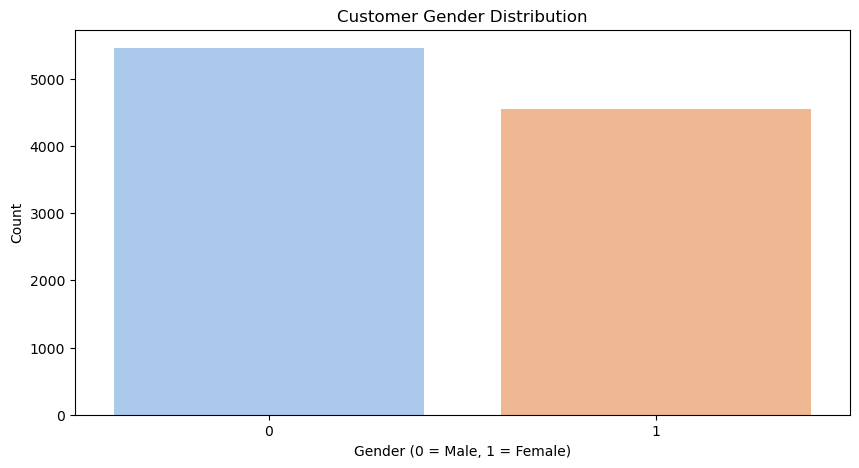

In [61]:
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Customer Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

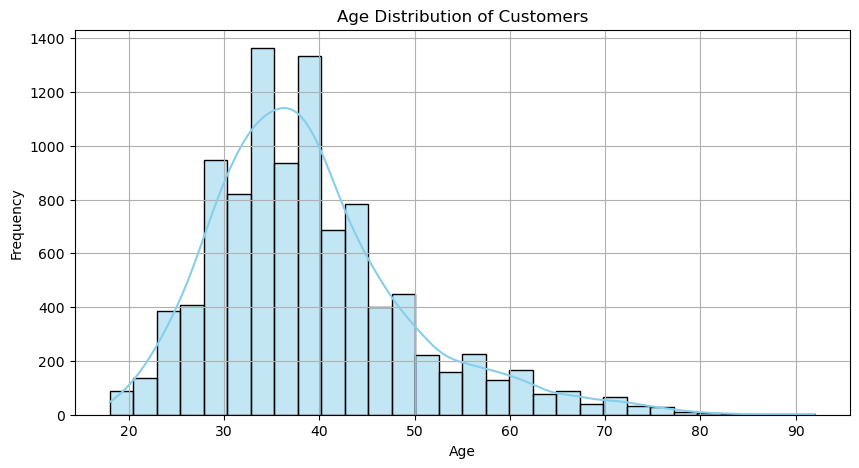

In [63]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [ ]:
#Correlation Matrix

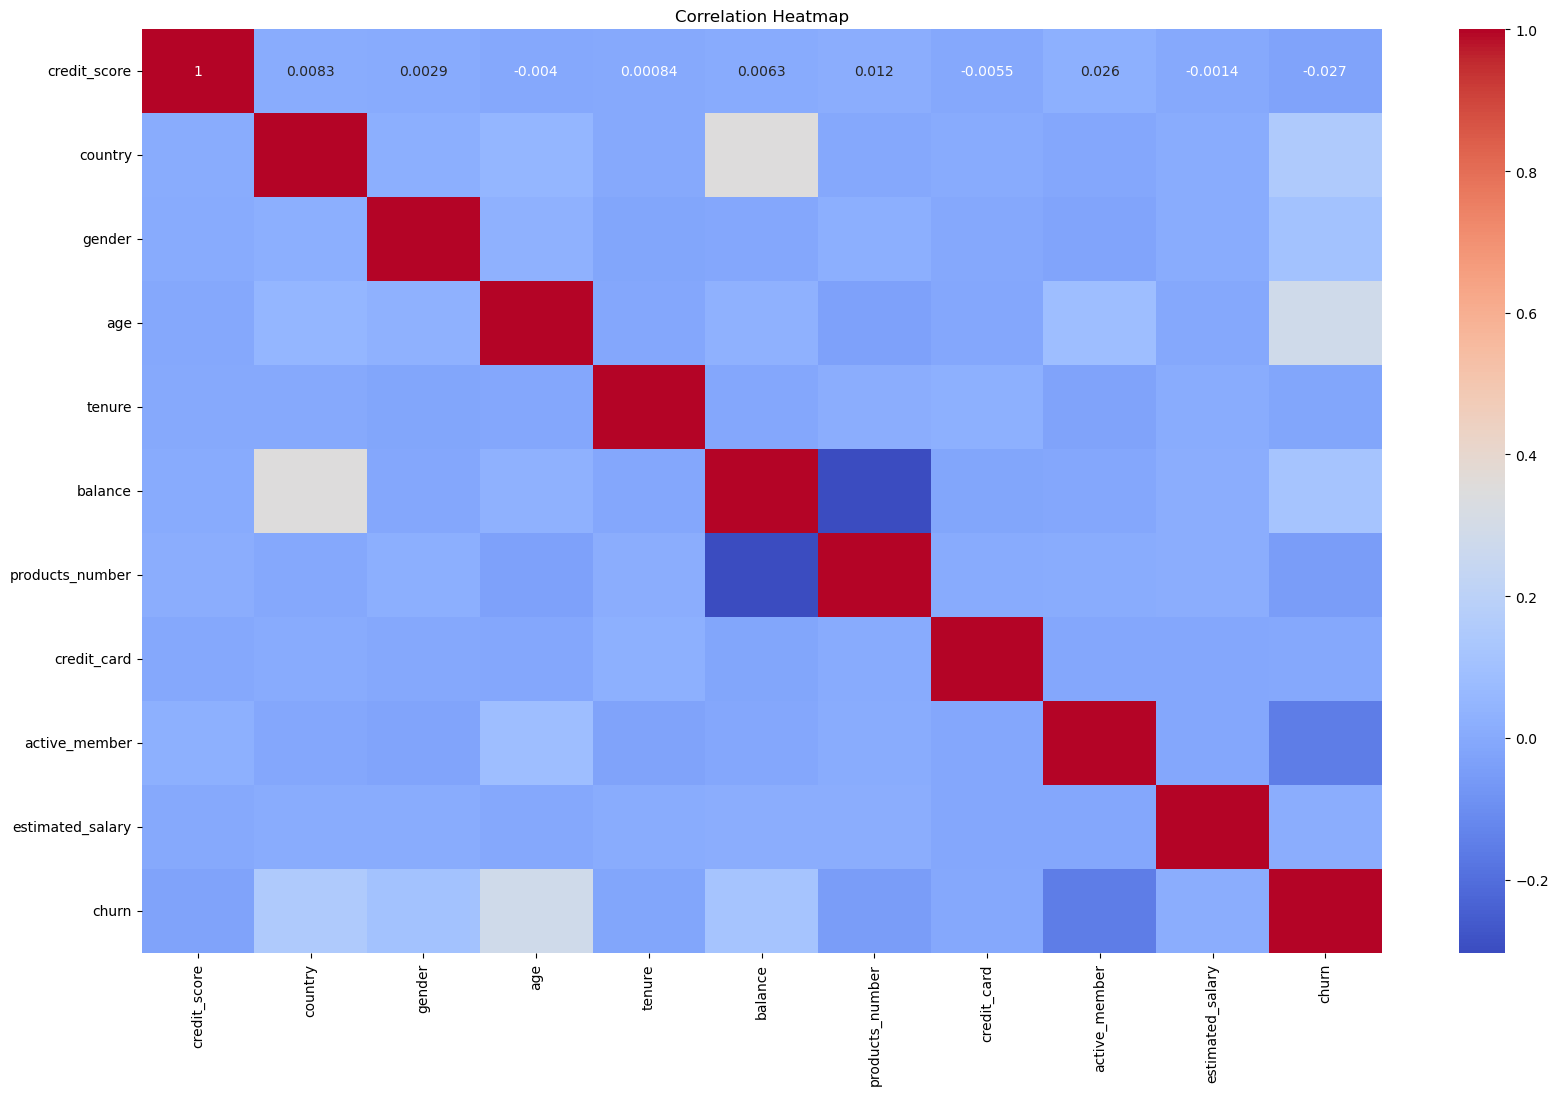

In [65]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Modeling

In [ ]:
# Define features and target variable

In [67]:
X = df.drop(columns='churn')  # Features
y = df['churn']                # Target variable

In [69]:
X

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64
9996,516,0,0,35,10,57369.61,1,1,1,101699.77
9997,709,0,1,36,7,0.00,1,0,1,42085.58
9998,772,2,0,42,3,75075.31,2,1,0,92888.52


In [71]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [ ]:
# Train-test split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20, stratify=y)
print(f'Train shapes: {X_train.shape}, {y_train.shape} | Test shapes: {X_test.shape}, {y_test.shape}')

Train shapes: (8000, 10), (8000,) | Test shapes: (2000, 10), (2000,)


In [ ]:
# Feature scaling and encoding

In [75]:
numerical_features = ['credit_score', 'age', 'balance', 'estimated_salary']
categorical_features = ['country', 'gender', 'products_number', 'active_member']

In [ ]:
# Pipeline

In [ ]:
# Preprocessing pipeline

In [77]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [ ]:
# Create a pipeline for Random Forest

In [79]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42))])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['credit_score', 'age',
                                                   'balance',
                                                   'estimated_salary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['country', 'gender',
                                                   'products_number',
                                                   'active_member'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])

In [ ]:
# Random Forest

In [ ]:
# Predictions and evaluation for Random Forest

In [80]:
rf_y_pred = rf_pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred) * 100)
print(classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 85.8
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
# XGBClassifier

In [ ]:
# Hyperparameter tuning for XGBoost using GridSearchCV

In [83]:
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', XGBClassifier(random_state=42))])
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7, 9]
}

grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'balance',
                                                                          'estimated_salary']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['country',
                                                                          'gender',
                                                                          'products_number',
                                                                          'active_member'])])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      cols...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7, 9],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Model evaluation for XGBoost

In [85]:
xgb_best = grid_search.best_estimator_
xgb_y_pred = xgb_best.predict(X_test)
print("XGBoost Best Parameters:", grid_search.best_params_)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_y_pred) * 100)
print(classification_report(y_test, xgb_y_pred))

XGBoost Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
XGBoost Accuracy: 86.5
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.48      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000

